# Đọc lên dataset: iris.data 

### Load file, đọc text trong file, tách ra thành từng trường thông tin

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X = []
y_text = []
data = []

reader = open('./iris.data')
lines = reader.readlines()


for line in lines:
    if len(line)<=1:
        continue
    line = line.strip()
    arr = line.split(',')
    data.append(arr)


### Chuyển sang kiểu ma trận numpy

In [11]:
import numpy as np
data = np.array(data)

X = data[:,:-1]
y_text = data[:,-1]
X = X.astype(float)


In [92]:
np.save(open('X.npy','wb'),X)

In [93]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Chuyển nhãn sang kiểu số

In [14]:

y = []
for i in range(y_text.shape[0]):
    label = y_text[i]
    if label=='Iris-setosa':
        y.append(0)
    elif label == 'Iris-versicolor':
        y.append(1)
    else:
        y.append(2)
y = np.array(y)

print (y.shape)
        

(150,)


### Vẽ Minh hoạ dataset

In [19]:
import matplotlib.pyplot as plt
arr1 = []
arr2 = []
arr3 = []

for point, label in zip(X,y):
  if label == 0:
    arr1.append(point)
  if label == 1:
    arr2.append(point)
  if label == 2:
    arr3.append(point)

arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)

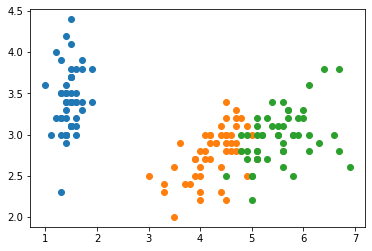

In [26]:
col1_id = 2
col2_id = 1
plt.scatter(arr1[:,col1_id],arr1[:,col2_id])
plt.scatter(arr2[:,col1_id],arr2[:,col2_id])
plt.scatter(arr3[:,col1_id],arr3[:,col2_id])

Tìm hiểu thêm:
https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Chia dữ liệu thành các bộ để huấn luyện và kiểm thử


In [27]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.9)

In [59]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((15, 4), (15,), (135, 4), (135,))

#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Chạy các thuật toán machine learning

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Cú pháp: model.fit()
model.predict()

Tìm hiểu tham số của các mô hình

In [61]:
# model = KNeighborsClassifier()
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [64]:
y_predict = model.predict(X_test)

In [63]:
model.score(X_test, y_test)

0.9037037037037037

In [82]:
import sklearn
conf = sklearn.metrics.confusion_matrix(y_test, y_predict,normalize='true')

In [83]:
conf

array([[1.        , 0.        , 0.        ],
       [0.        , 0.9787234 , 0.0212766 ],
       [0.        , 0.26666667, 0.73333333]])

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

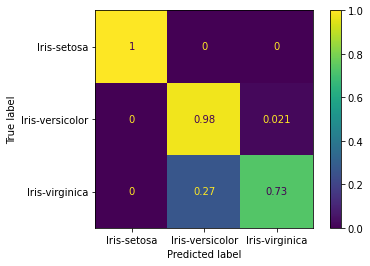

In [85]:

disp = ConfusionMatrixDisplay(conf, display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
disp.plot()

Đánh giá mô hình

In [68]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict,average='macro')

(0.9212305611899932, 0.9040189125295508, 0.9038778380550533, None)

Tìm hiểu tham số macro

### Đánh gía kết quả

#### hàm model.score()

T-SNE

In [95]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [89]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [90]:
!pip install scikit-learn==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Ignored the following versions that require a different python version: 1.1.0 Requires-Python >=3.8; 1.1.0rc1 Requires-Python >=3.8; 1.1.1 Requires-Python >=3.8
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.1 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn==1.1.1


In [91]:
!python --version

Python 3.7.13


# Thực hành trên dữ liệu hạt giống thóc


###Chuẩn hoá dữ liệu , sử dụng các hàm trong thư viện https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing